# Web Scrapping Project

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import logging

Urllib package is the URL handling module for python. It is used to fetch URLs (Uniform Resource Locators). It uses the urlopen function

We are going to scrap data from the flipkart website. Search iphone on flipkart. Check the URL. It will be something like this

https://www.flipkart.com/search?q=iphone....

As you can see, it is similar to giving data throgh URL in our FLASK1 lecture. Hence, if you replace anything with iphone and then go to that link, you will be redirected to flipkart page with that search.

eg -  https://www.flipkart.com/search?q=tv will search tv on flipkart



In [2]:
flipkart_url = "https://www.flipkart.com/search?q=" + "tv"
flipkart_url

'https://www.flipkart.com/search?q=tv'

urllib.request

This module helps to define functions and classes to open URLs (mostly HTTP). One of the most simple ways to open such URLs is :
urllib.request.urlopen(url)

In [3]:
url_client = urlopen(flipkart_url)

In [4]:
flipkart_page = url_client.read()

In [5]:
flipkart_page

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

Hence, in this way, whole data of that website will be screped. But , you can see that this data is fully unstructured and not in human readable format, we cannot gain any insights from it. Hence, we will first convert it into a format which will help to understand the data better. BeautifulSoup will help is in doing that, .i.e it beautifies the random and unstructured data

In [6]:
soup = bs(flipkart_page, 'html.parser') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

The above data is somewhat readable and structured in comparsion to the previous data. Hence, this is the main aim of beautifulsoup

Now, our main aim is to open each product on this website.

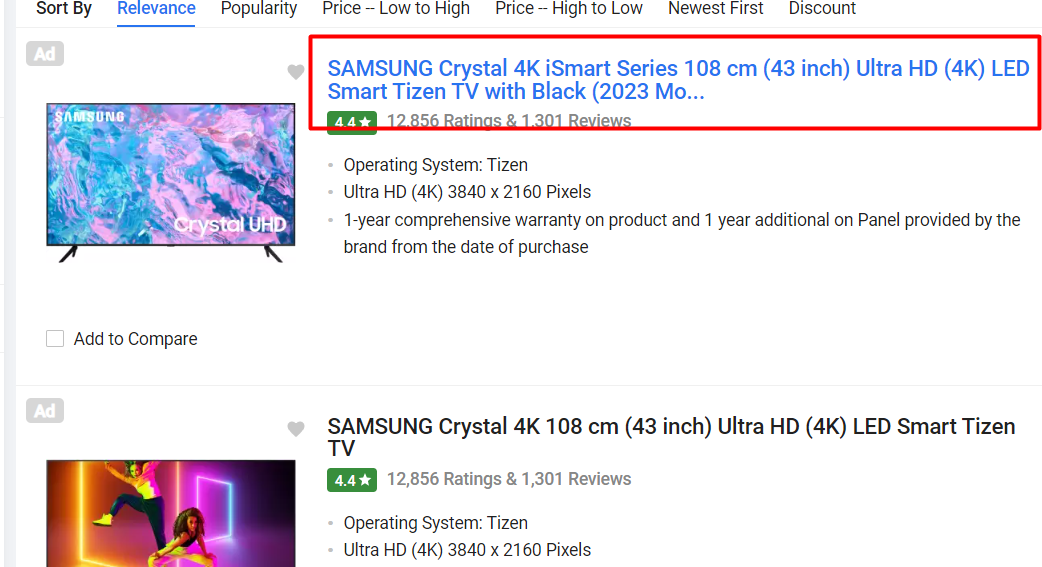

When I click on this link, The following should open and this feature should be available in my code.

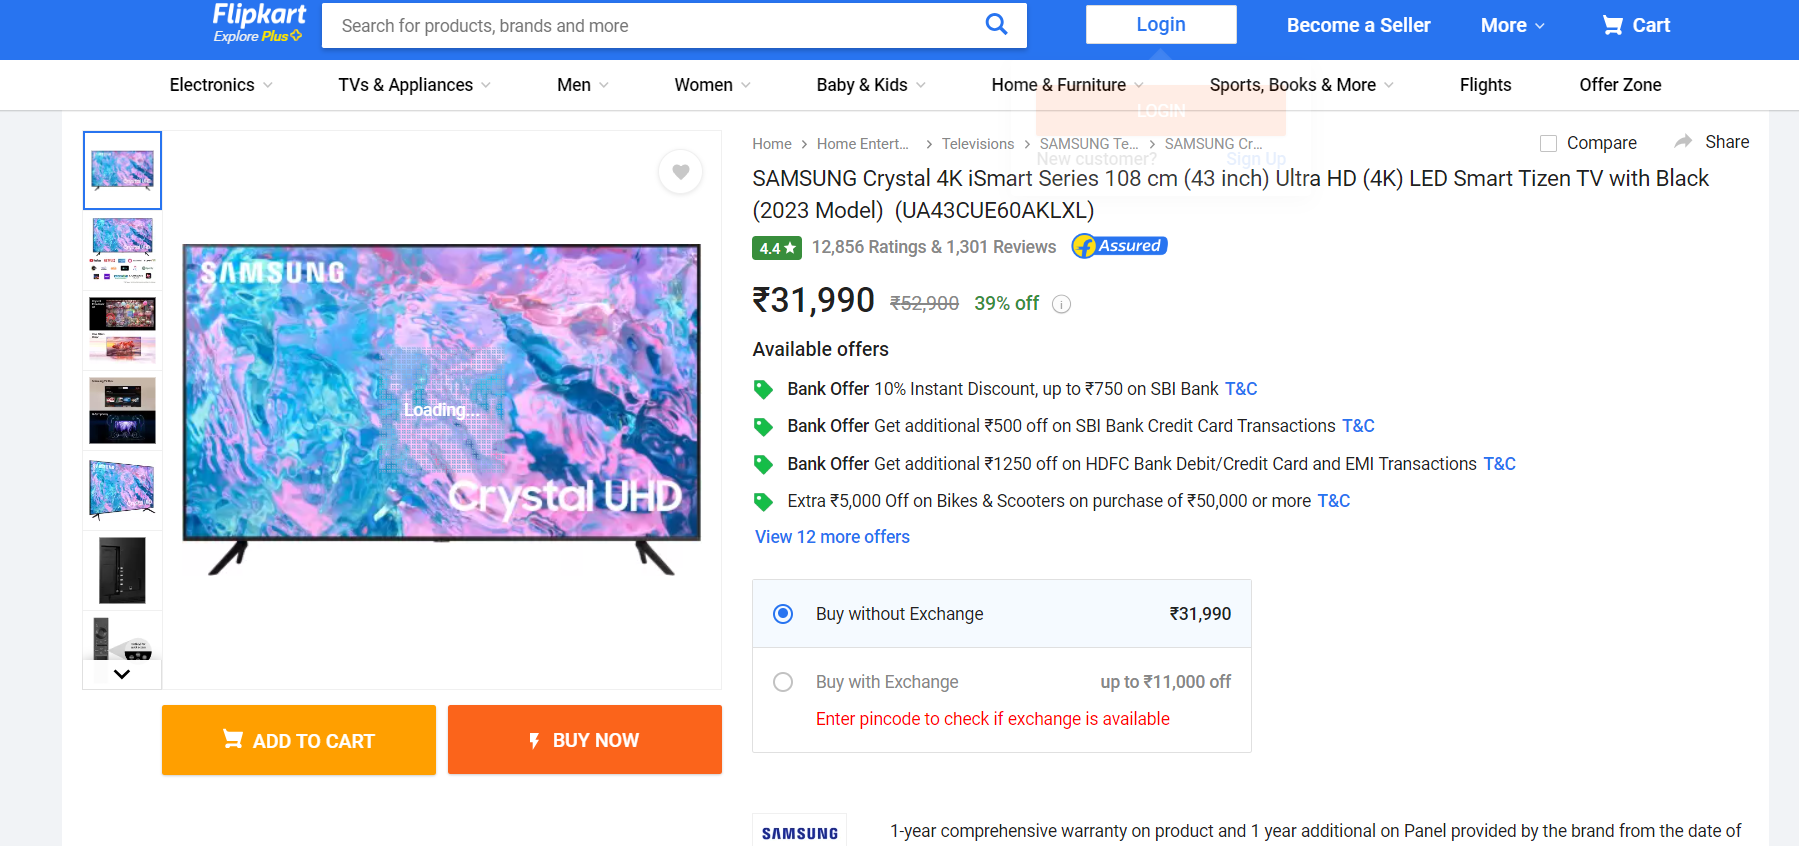

Go to flipkart_url .i.e https://www.flipkart.com/search?q=tv  and inspect the website. You will see the full html code for that website. Search for the part of HTML code which contains the individual products.

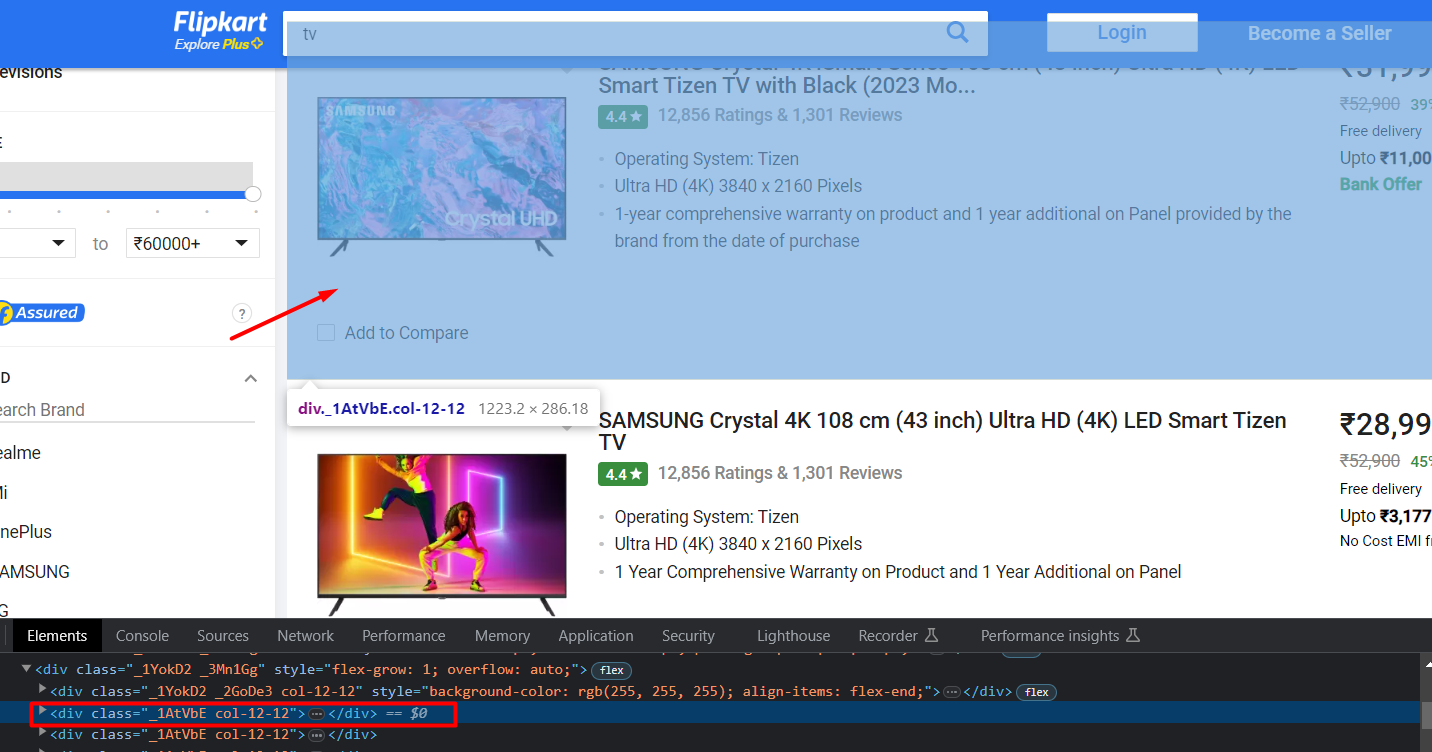

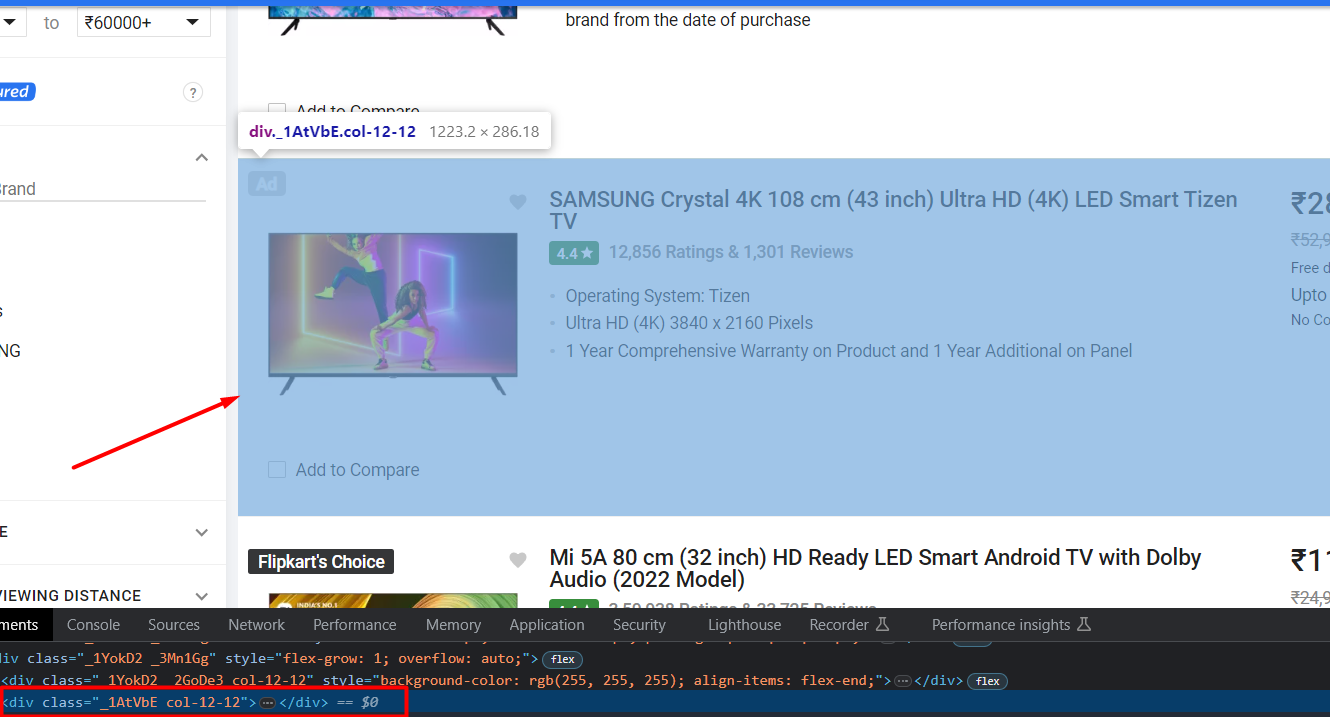

If you open the above line of HTML code .i.e

image.png

You can expand it to see the detailed code

In this way, you can find the hyperlink for individual product itself

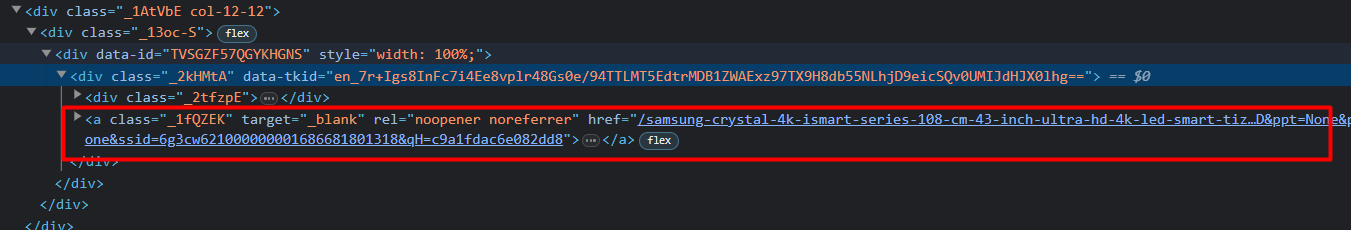

This hyperlink will take us to that product's detail page

Double click on the link and you will get the full link

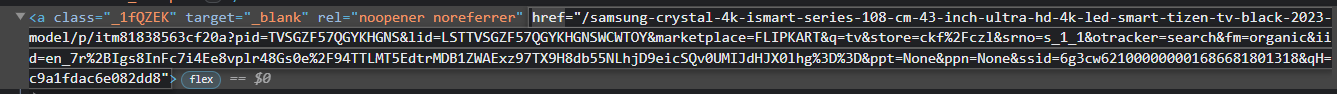

Attaching flipkart base url to this link

In [7]:
" https://www.flipkart.com"  +  "/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&lid=LSTTVSGZF57QGYKHGNSWCWTOY&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_1&otracker=search&fm=organic&iid=en_7r%2BIgs8InFc7i4Ee8vplr48Gs0e%2F94TTLMT5EdtrMDB1ZWAExz97TX9H8db55NLhjD9eicSQv0UMIJdHJX0lhg%3D%3D&ppt=None&ppn=None&ssid=6g3cw621000000001686681801318&qH=c9a1fdac6e082dd8"

' https://www.flipkart.com/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&lid=LSTTVSGZF57QGYKHGNSWCWTOY&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_1&otracker=search&fm=organic&iid=en_7r%2BIgs8InFc7i4Ee8vplr48Gs0e%2F94TTLMT5EdtrMDB1ZWAExz97TX9H8db55NLhjD9eicSQv0UMIJdHJX0lhg%3D%3D&ppt=None&ppn=None&ssid=6g3cw621000000001686681801318&qH=c9a1fdac6e082dd8'

As, you can see, this page takes us to the indicidual product details page

Now, our main aim is to automate this process and we should be able to open muliple prouct detail pages for multiple products

Now, html code for each individual product comes under a div tag with a specific class as given below
and each product's div tag has the same class

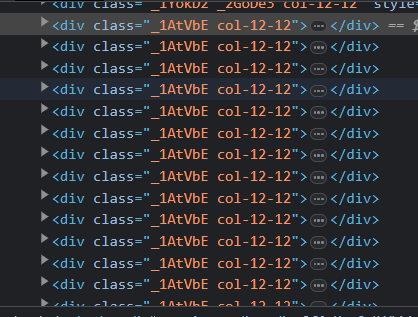

You can inspect and hover over each div tag here, it will highlight each individual product

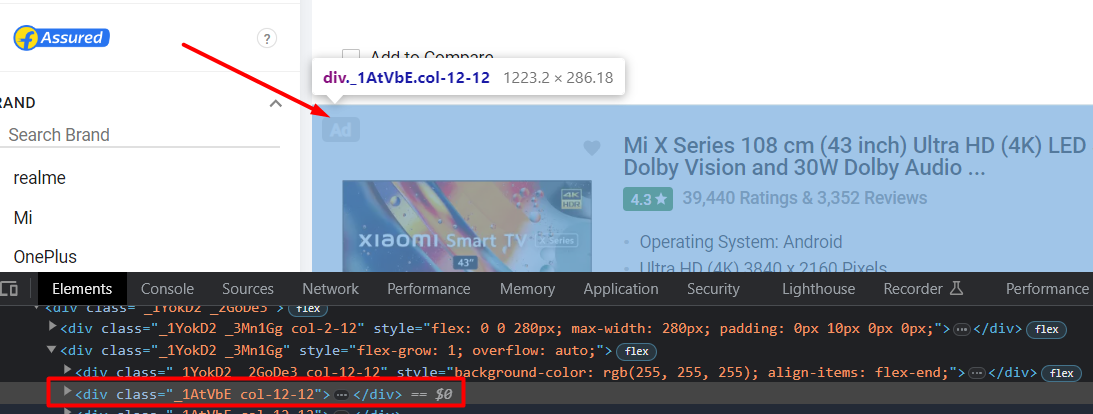

In [8]:
#Hence, we will try to extract all these div classes, so as to extract all individual products

bigbox = soup.find_all("div" , {"class":"_1AtVbE col-12-12"})

# This will give us a list of all the div tags for individual products. Hence, number of elements in list == no. of products.

bigbox

[<div class="_1AtVbE col-12-12"><div class="_1KOcBL"><section class="JWMl0H _2hbLCH"><div class="_2ssEMF"><div class="_3V8rao"><span>Filters</span></div></div></section><div class="_2q_g77"><section class="_2aDURW"><div class="_2lfNTw"><span>CATEGORIES</span></div><div><div class="TB_InB"><span><svg class="_2Iqv73" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="_3zK8He" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="_2qvBBJ _2Mji8F" href="/home-entertainment/pr?sid=ckf&amp;q=tv&amp;otracker=categorytree" title="Home Entertainment">Home Entertainment</a></div></div><div><div class="TB_InB"><span><svg class="_2Iqv73" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="_1jJQdf _2Mji8F" href="/televisions/pr?sid=ckf,czl&amp;q=tv&amp;o

In [9]:
len(bigbox)

30

Hence, we have 30 div tags with same classes.

But the first 2....3 div tags are of no use as they do not contain product. They contain status bar / title / other things.
Below is the example

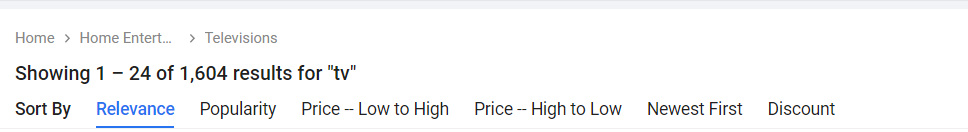


Hence, we delete first 2...3 elements from the list


In [10]:
del bigbox[0:3]

 Now, our only main aim is to extract the URLs to each individual products page. We can see that the URL for product page is given in ***a*** tag.

 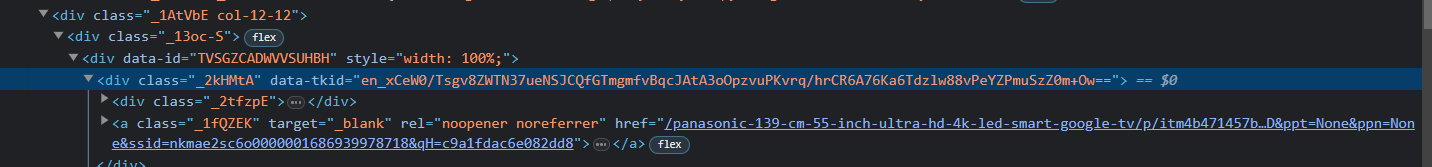

 This a tag is present inside div -> div -> div -> a

In [11]:
bigbox[0].div.div.div.a

<a class="_1fQZEK" href="/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&amp;lid=LSTTVSGZF57QGYKHGNSWCWTOY&amp;marketplace=FLIPKART&amp;q=tv&amp;store=ckf%2Fczl&amp;srno=s_1_2&amp;otracker=search&amp;fm=organic&amp;iid=en_cJdXekKCpWnjWHy35vsw5nrFId098xcLtgxEISZ4Hl9vObWO5NVoCohQajWt95sQjD9eicSQv0UMIJdHJX0lhg%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=71tqmvrjeo0000001687147659581&amp;qH=c9a1fdac6e082dd8" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="SAMSUNG Crystal 4K iSmart Series 108 cm (43 inch) Ultra HD (4K) LED Smart Tizen TV with Black (2023 Mo..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/television/n/d/e/ua43cue60aklxl-samsung-original-imagp7vgwf7emfqa.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><

 Now, we only need href. Hence,


In [12]:
bigbox[0].div.div.div.a["href"]

'/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&lid=LSTTVSGZF57QGYKHGNSWCWTOY&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_2&otracker=search&fm=organic&iid=en_cJdXekKCpWnjWHy35vsw5nrFId098xcLtgxEISZ4Hl9vObWO5NVoCohQajWt95sQjD9eicSQv0UMIJdHJX0lhg%3D%3D&ppt=None&ppn=None&ssid=71tqmvrjeo0000001687147659581&qH=c9a1fdac6e082dd8'

In [13]:
# Now, if we append this url with "https://www.flipkart.com/" url we will get individual product page link

prod_link = "https://www.flipkart.com" + bigbox[0].div.div.div.a["href"]

Try searching the above link, you will be redirected to individual product page

In [14]:
# Now we will extract links for all individual product pages

for i in bigbox:
  print("https://www.flipkart.com" + i.div.div.div.a["href"])

https://www.flipkart.com/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&lid=LSTTVSGZF57QGYKHGNSWCWTOY&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_2&otracker=search&fm=organic&iid=en_cJdXekKCpWnjWHy35vsw5nrFId098xcLtgxEISZ4Hl9vObWO5NVoCohQajWt95sQjD9eicSQv0UMIJdHJX0lhg%3D%3D&ppt=None&ppn=None&ssid=71tqmvrjeo0000001687147659581&qH=c9a1fdac6e082dd8
https://www.flipkart.com/samsung-80-cm-32-inch-hd-ready-led-smart-tizen-tv-bezel-free-design/p/itm3c07ddc2dd25d?pid=TVSGHY2UZA9YHWQN&lid=LSTTVSGHY2UZA9YHWQNCPAW6M&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&spotlightTagId=FkPickId_ckf%2Fczl&srno=s_1_3&otracker=search&fm=organic&iid=057b6920-d796-43fe-bdd1-ad04adaf3d53.TVSGHY2UZA9YHWQN.SEARCH&ppt=None&ppn=None&ssid=71tqmvrjeo0000001687147659581&qH=c9a1fdac6e082dd8
https://www.flipkart.com/infinix-y1-80-cm-32-inch-hd-ready-led-smart-linux-tv-wall-mount/p/itme5476ca89d1b0?pid=TVSGFGF34GMTB9KF&lid=LSTTVSGF

AttributeError: ignored

Ignore the exception as we will handle it. You can see that we have extracted links for multiple individual product pages.

In [15]:
prod_link

'https://www.flipkart.com/samsung-crystal-4k-ismart-series-108-cm-43-inch-ultra-hd-4k-led-smart-tizen-tv-black-2023-model/p/itm81838563cf20a?pid=TVSGZF57QGYKHGNS&lid=LSTTVSGZF57QGYKHGNSWCWTOY&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_2&otracker=search&fm=organic&iid=en_cJdXekKCpWnjWHy35vsw5nrFId098xcLtgxEISZ4Hl9vObWO5NVoCohQajWt95sQjD9eicSQv0UMIJdHJX0lhg%3D%3D&ppt=None&ppn=None&ssid=71tqmvrjeo0000001687147659581&qH=c9a1fdac6e082dd8'

Now for each individual product page, we have to extract Rating, comment header, comment and the name of the person who commented

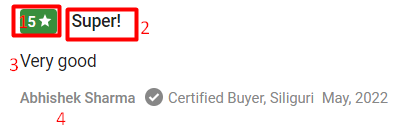

In [16]:
requests.get(prod_link)

<Response [200]>


When we are reading the tv page, we used urlopen but while opeaning each product page, why did we use requests module. We can use the same urlopen right?

***Yes, you can use urlopen to open each product page as well. The reason requests module is used in that part of the code is that it provides more functionality and flexibility for handling HTTP requests and responses, including sending different types of requests, adding headers and parameters to requests, handling redirects and errors, and more. In some cases, using requests module may be necessary to handle certain types of websites or to perform more advanced web scraping tasks. However, for simple tasks like opening a webpage or downloading a file, urllib or urllib2 modules are often sufficient.***

In [17]:
prod_req = requests.get(prod_link)
prod_req

<Response [200]>

In [18]:
prod_req.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

You can see above that requests.get(***link***) will return the whole content on the webpage at the address of ***link***

In [19]:
# Now for human readable format, we can use BeautifulSoup

prod_html = bs(prod_req.text, "html.parser")

In [20]:
prod_html

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

Now, from this whole dump, we only want to scrap reviews, ratings, comment etc

When you inspect the individual producr page, you can clearly see that each of the reviews comes under a div tag and they have same class. Inside this div tag, the rating, the comment, the comment header, and name of commentor is present

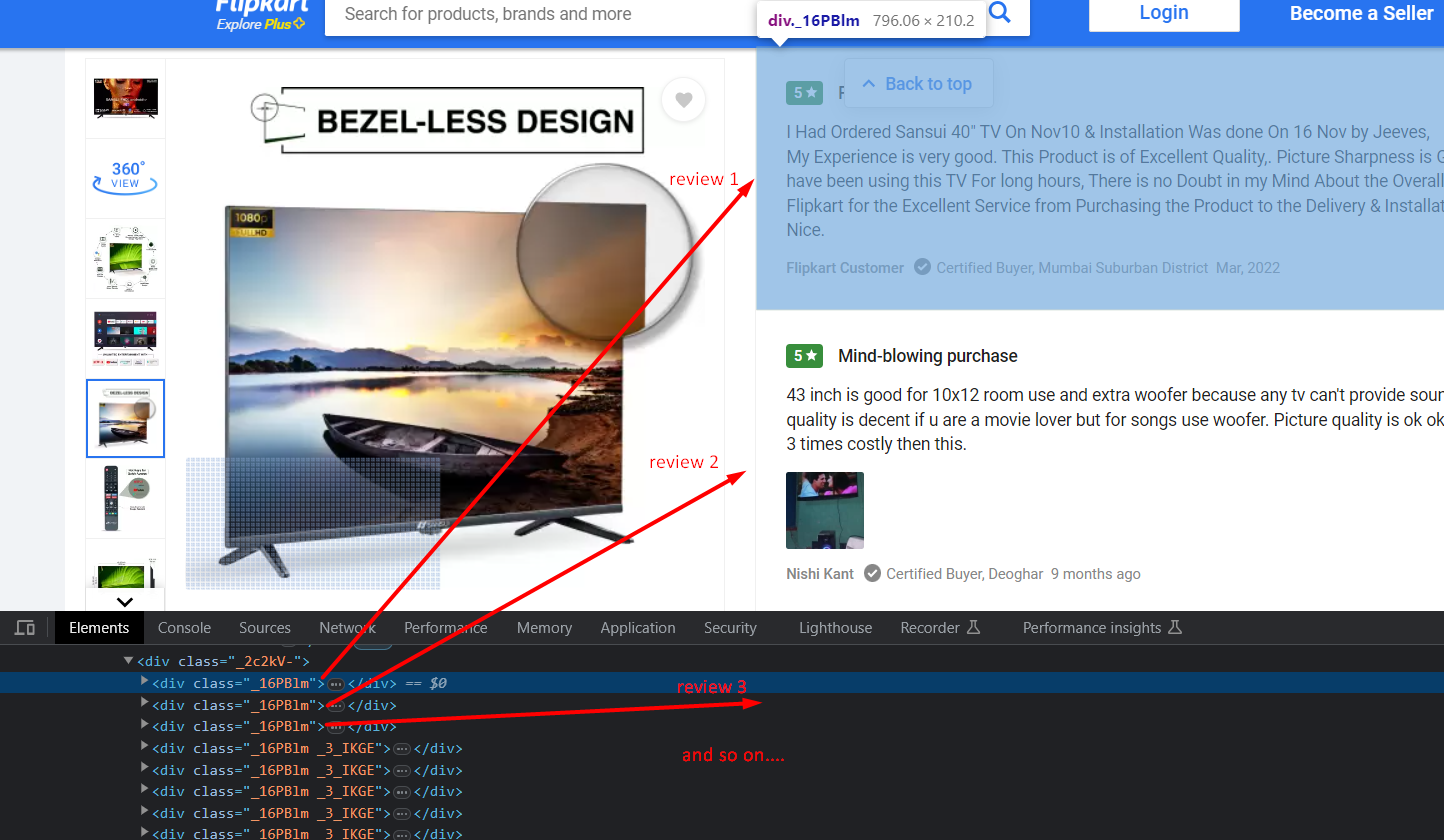

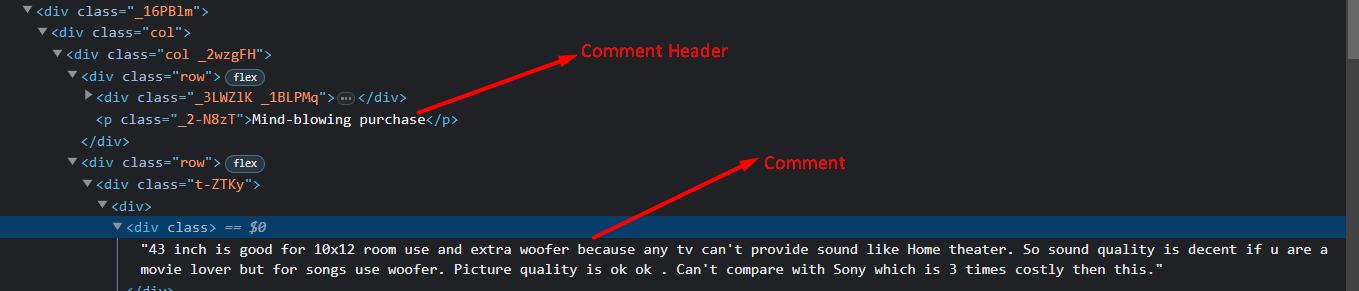

In [21]:
comment_box = prod_html.find_all('div', {'class':"_16PBlm"})   # returns list of all div tags with given class. (here, it is product reviews)

In [22]:
comment_box

[<div class="_16PBlm"><div class="col"><div class="col _2wzgFH"><div class="row"><div class="_3LWZlK _1BLPMq">5</div><p class="_2-N8zT">Perfect product!</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Excellent product. Excellent delivery &amp; installation. You just need a good internet connection to enjoy this television. One of the best in the category.</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div></div><div class="_2nMSwX _3oLIki"><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202110/blobio-imr-202110_fb912f67d84f48efb77c2c1e8b3dca07.jpg?q=90), url();width:62px;height:62px"></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Amlan Ghosh</p><svg class="_2a1p_T" height="14" viewbox="0 0 12 12" width="14" xmlns="http://www.w3.org/2000/svg"><g><circle cx="6" cy="6" fill="#878787" r="6"></circle><path d="M3 6l2 2 4-4" fill="#878787" stroke="#FFF" stroke-width=

In [23]:
len(comment_box)

11

Hence, we have total 11 comments on this page

Now, to extract the name of the commentor. we can see that it is under

In [24]:
comment_box[1].div.div.find_all('p',{"class":"_2sc7ZR _2V5EHH"})

[<p class="_2sc7ZR _2V5EHH">Prasiddha Khanikar</p>]

In [25]:
comment_box[1].div.div.find_all('p',{"class":"_2sc7ZR _2V5EHH"})[0].text

'Prasiddha Khanikar'

In [26]:
for i in comment_box:
  print( i.div.div.find_all('p',{"class":"_2sc7ZR _2V5EHH"})[0].text )

Amlan Ghosh
Prasiddha Khanikar
MOHD FARAZ
Anirban Haldar
Ravi Kant
M K Raju
Santanu Saha
Rohan Bajaj
Chetan Patil
Sanjeet Dash


AttributeError: ignored

Now, suppose you want to extract ratings

In [41]:
comment_box[0].div.div.div.div.text

'5'

In [43]:
for i in comment_box:
  print(i.div.div.div.div.text)

5
5
5
5
4
5
4
5
5
5


AttributeError: ignored

Now, we will extract comment headers

In [54]:
comment_box[0].div.div.div.p.text

'Perfect product!'

In [56]:
for i in comment_box:
  print(  i.div.div.div.p.text  )

Perfect product!
Perfect product!
Awesome
Super!
Good quality product
Worth every penny
Really Nice
Super!
Simply awesome
Super!


AttributeError: ignored

Extracing the actual comments:

In [70]:
comment_box[0].div.div.div.div.text

'5'

In [71]:
comment_box[0].div.div.find_all('div', {"class":""})

[<div><div class="">Excellent product. Excellent delivery &amp; installation. You just need a good internet connection to enjoy this television. One of the best in the category.</div><span class="_1H-bmy"><span>READ MORE</span></span></div>,
 <div class="">Excellent product. Excellent delivery &amp; installation. You just need a good internet connection to enjoy this television. One of the best in the category.</div>,
 <div></div>]

In [73]:
# Now, we are getting a list above, so we can just extract 0th index

comment_box[0].div.div.find_all('div', {"class":""})[0]

<div><div class="">Excellent product. Excellent delivery &amp; installation. You just need a good internet connection to enjoy this television. One of the best in the category.</div><span class="_1H-bmy"><span>READ MORE</span></span></div>

In [74]:
comment_box[0].div.div.find_all('div', {"class":""})[0].text

'Excellent product. Excellent delivery & installation. You just need a good internet connection to enjoy this television. One of the best in the category.READ MORE'

In [83]:
for i in comment_box:
  print(  i.div.div.find_all('div', {"class": ""})[0].text, "\n"  )

Excellent product. Excellent delivery & installation. You just need a good internet connection to enjoy this television. One of the best in the category.READ MORE 

Very impressive picture quality .Good color balance and  video presets are available unlike some tv's where colors are more defined for watching soaps and reality shows(by default). Connectivity is great. Connets to 2.5 as well as 5ghz wifi band . Remote operation is intuitive. Software experience is good. There is no voice asistance ( only available in pro i think) but its not a deal breaker for me. The hdfc cashbacks and flipkart plus discounts makes it a very lucrative deal.  Sound is ov...READ MORE 

It's a very good product. Working fine with great picture quality. Sound is good with only 20W speakers.READ MORE 

Great choice. I am very confused between oneplus and realme and mi then I decided to Samsung or lg 4K tv. Then choose very trusted Samsung Brand. Nice choice great picture and easy to use TV.READ MORE 

1. Scr

AttributeError: ignored

Hence, in this way, we can scrap any websites like amazon, youtube, etc, in the easiest possible manner